In [1]:
import pandas as pd
import numpy as np
import pylab as pylab
import matplotlib.pyplot as pl
%matplotlib


In [10]:
df_FuelConsumption = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv')

#print(df_FuelConsumption.head())
#print(df_FuelConsumption.tail())

In [17]:
df_FuelConsumption.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [18]:
df_FuelConsumption.describe(include='object')

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


In [12]:
print(df_FuelConsumption.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
None

In [19]:
df_consumption = df_FuelConsumption[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df_consumption.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


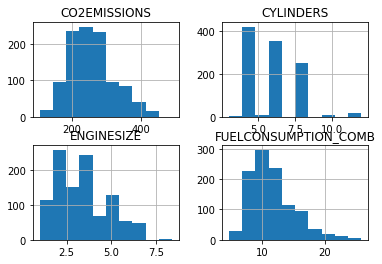

In [22]:
df_consumption.hist()
pl.show()

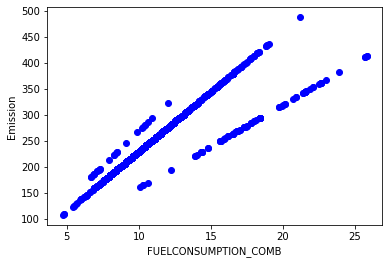

In [26]:
pl.scatter(df_consumption.FUELCONSUMPTION_COMB, df_consumption.CO2EMISSIONS,  color='blue')
pl.xlabel("FUELCONSUMPTION_COMB")
pl.ylabel("Emission")
pl.show()

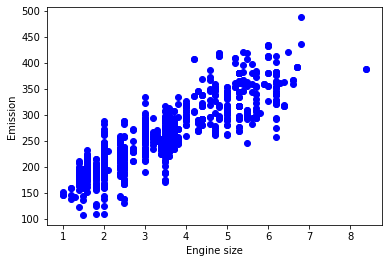

In [28]:
pl.scatter(df_consumption.ENGINESIZE, df_consumption.CO2EMISSIONS,  color='blue')
pl.xlabel("Engine size")
pl.ylabel("Emission")
pl.show()

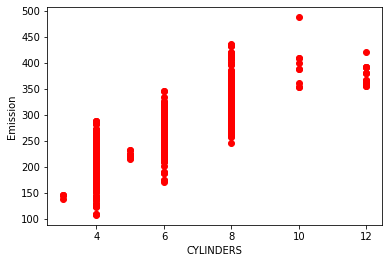

In [31]:
pl.scatter(df_consumption.CYLINDERS, df_consumption.CO2EMISSIONS,  color='red')
pl.xlabel("CYLINDERS")
pl.ylabel("Emission")
pl.show()

In [32]:
msk = np.random.rand(len(df_consumption)) < 0.8
train = df_consumption[msk]
test = df_consumption[~msk]


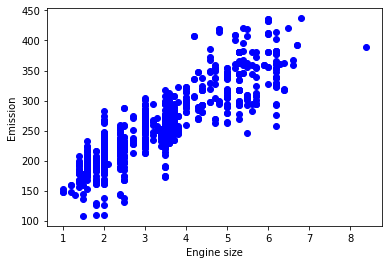

In [33]:
pl.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
pl.xlabel("Engine size")
pl.ylabel("Emission")
pl.show()

In [34]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.38293833]]
Intercept:  [124.99319692]


Text(0, 0.5, 'Emission')

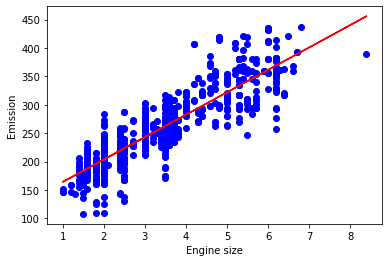

In [35]:
pl.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
pl.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
pl.xlabel("Engine size")
pl.ylabel("Emission")

In [36]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 22.67
Residual sum of squares (MSE): 902.22
R2-score: 0.70
